In [16]:
from matplotlib import pyplot as plt

## download image

In [17]:
import os
import requests

dir_path = os.path.abspath("../images/east-model")
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

def download_image(name,url):
    path = os.path.join(dir_path, f"{name}")
    response = requests.get(url)

    if response.status_code == 200:
        with open(path, 'wb') as f:
            f.write(response.content)
        print(f"{path}")

def get_image(url):
    response = requests.get(url)

    if response.status_code == 200:
        return response.content

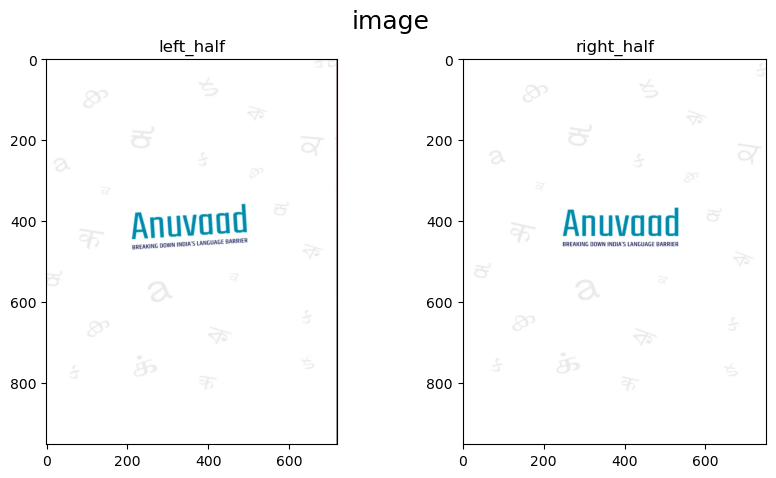

In [18]:
import cv2
import numpy as np

data = get_image('https://miro.medium.com/v2/resize:fit:2000/format:webp/1*9oxSmS8RlOgaDiYmJsqAhA.png')
image = cv2.imdecode(np.frombuffer(data, np.uint8),flags=1)

height, width, _ = image.shape
half_width = width // 2 - 15

left_half = image[:, :half_width]
right_half = image[:, half_width:]

path = os.path.join(dir_path, f"9oxSmS8RlOgaDiYmJsqAhA.left_half.png")
cv2.imwrite(path, left_half)


fig = plt.figure(figsize=(10,5))
fig.suptitle('image', fontsize=18)
gs = fig.add_gridspec(1,2)

ax = fig.add_subplot(gs[0,0])
ax.set_title("left_half")
ax.imshow(left_half)

ax = fig.add_subplot(gs[0,1])
ax.set_title("right_half")
ax.imshow(right_half)
